In [2]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Get the current working directory and construct project root
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))

# Construct the path to the processed data
processed_data_path = os.path.join(project_root, 'data', 'processed', 'breast-cancer-processed.csv')

# Load the processed dataset
data = pd.read_csv(processed_data_path)

# Separate features and target
X = data.drop(columns=['diagnosis'])  # Replace 'diagnosis' with your target column name
y = data['diagnosis']

# Display the first few rows of the dataset
print("Processed Dataset:")
print(data.head())

Processed Dataset:
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25

Top 10 Features by Importance:
                 Feature  Importance
23            area_worst    0.139357
27  concave points_worst    0.132225
7    concave points_mean    0.107046
20          radius_worst    0.082848
22       perimeter_worst    0.080850
2         perimeter_mean    0.067990
6         concavity_mean    0.066917
3              area_mean    0.060462
26       concavity_worst    0.037339
0            radius_mean    0.034843


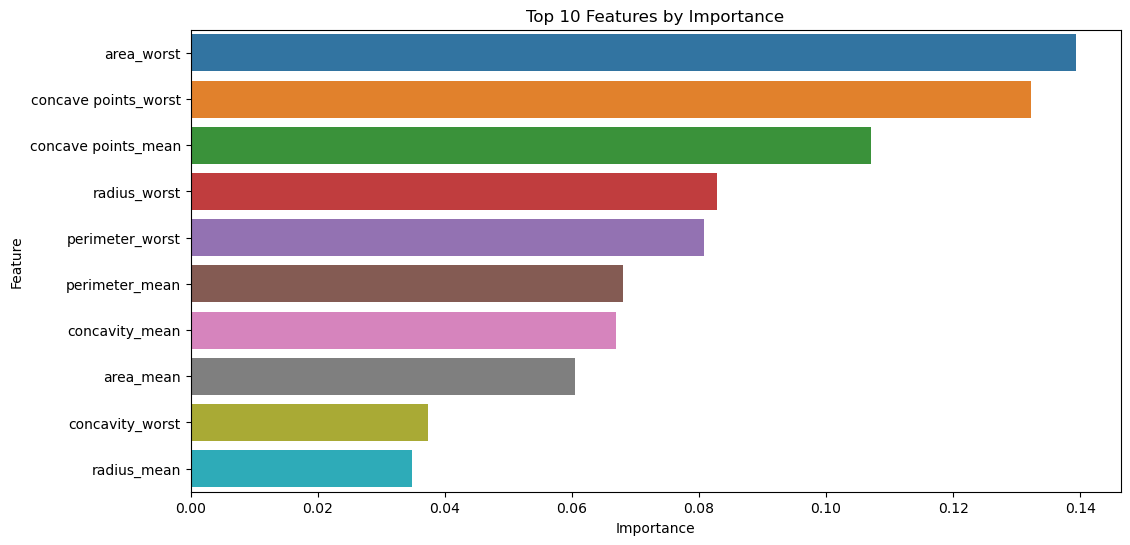

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier to calculate feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Features by Importance:")
print(feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Features by Importance')
plt.show()

Top 10 Features by Mutual Information:
                 Feature  Mutual Information
22       perimeter_worst            0.471842
23            area_worst            0.464313
20          radius_worst            0.451230
7    concave points_mean            0.438806
27  concave points_worst            0.436255
2         perimeter_mean            0.402361
6         concavity_mean            0.375447
0            radius_mean            0.362276
3              area_mean            0.360023
13               area_se            0.340759


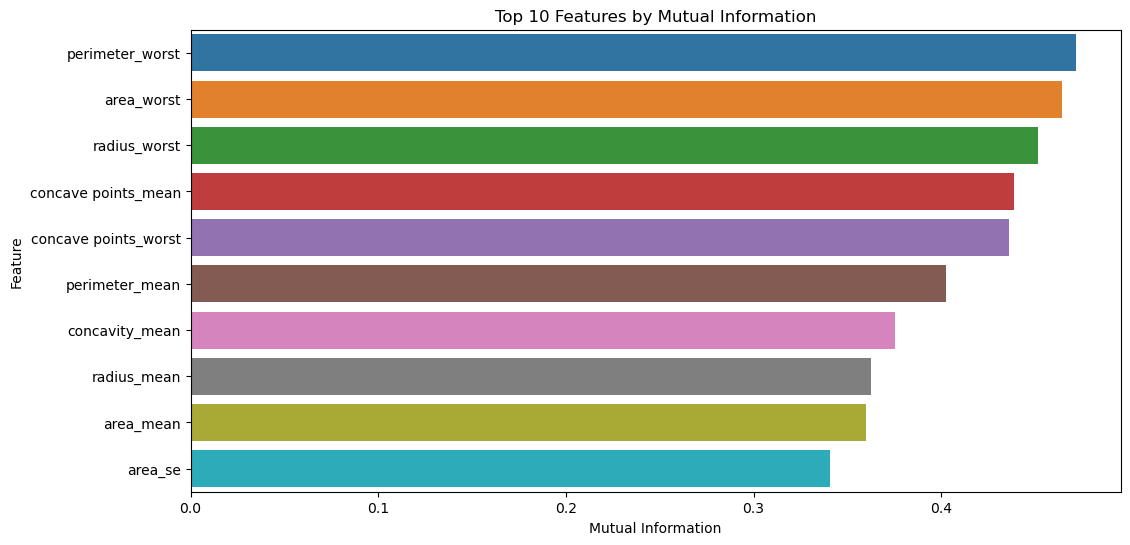

In [4]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for features
mutual_info = mutual_info_classif(X, y, random_state=42)
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

# Display top 10 features
print("Top 10 Features by Mutual Information:")
print(mutual_info_df.head(10))

# Plot mutual information
plt.figure(figsize=(12, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mutual_info_df.head(10))
plt.title('Top 10 Features by Mutual Information')
plt.show()

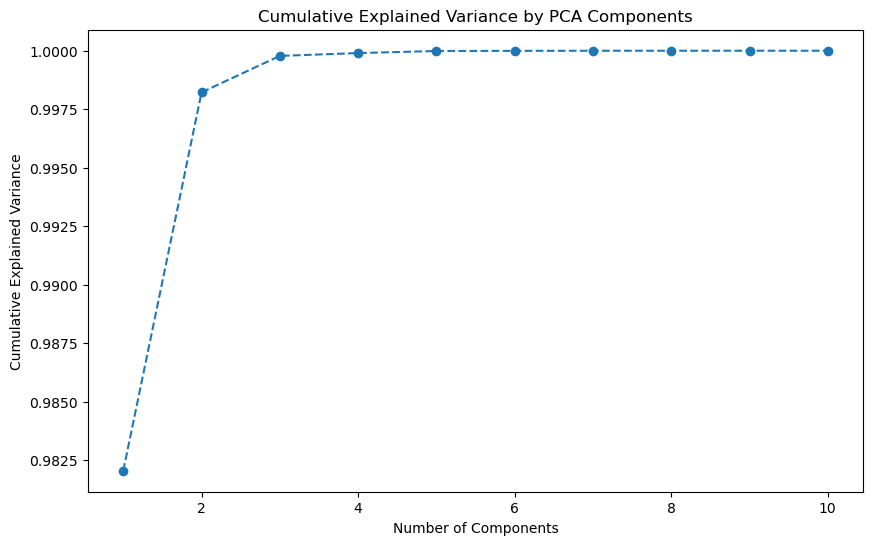

In [5]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=10)  # Retain top 10 components
X_pca = pca.fit_transform(X)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [7]:
# 4. Combine Selected Features
print("Combining selected features...")
final_selected_features = list(set(selected_features_rf + selected_features_mi))
X_selected = X[final_selected_features]

# Display the selected features
print("\nSelected Features:")
print(final_selected_features)

# 5. Save Selected Features Dataset
print("Saving the reduced dataset with selected features...")
selected_features_path = os.path.join(project_root, '../data/processed/breast-cancer-selected-features.csv')
X_selected_df = pd.DataFrame(X_selected, columns=final_selected_features)
X_selected_df['diagnosis'] = y.values  # Add the target column back
X_selected_df.to_csv(selected_features_path, index=False)
print(f"Selected features dataset saved to {selected_features_path}")

# End of the notebook
print("Feature selection and engineering completed. Proceed to modeling!")

Combining selected features...


NameError: name 'selected_features_rf' is not defined